In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import glob
from itertools import cycle

import mesa_reader as ms
from astropy.units import cds

MSol_to_MJup = (cds.Msun.to('kg')/cds.Mjup.to('kg'))
MEarth_to_MJup = (cds.Mgeo.to('kg')/cds.Mjup.to('kg'))

In [2]:
linecycler = cycle(["-","--", "-."])

planet_masses = [0.3, 0.5, 1., 3., 5., 10.]
core_masses = [1., 3., 5., 10., 30., 50.]

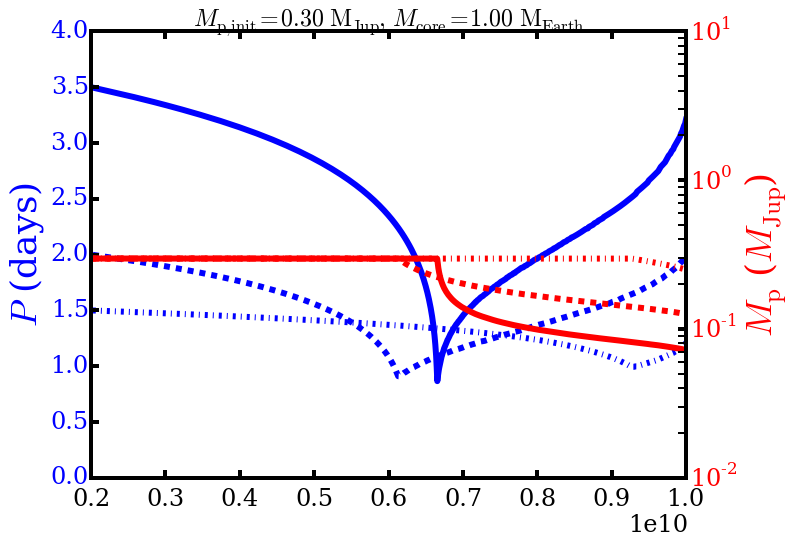

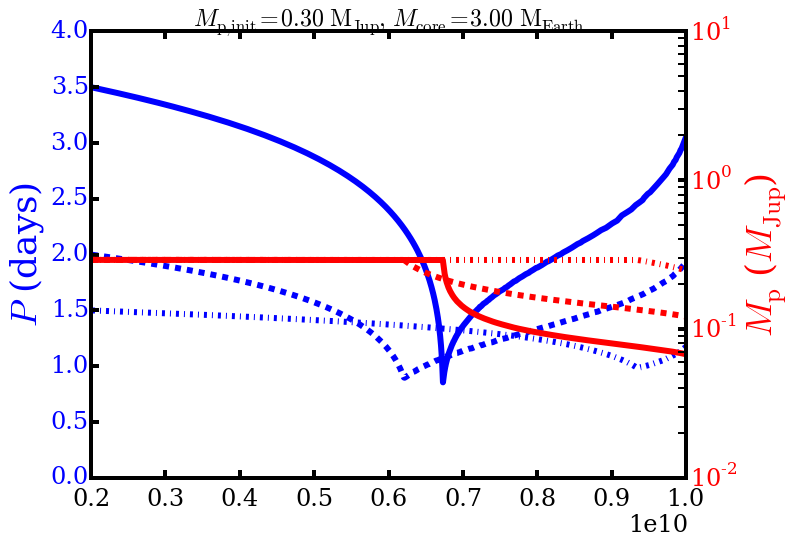

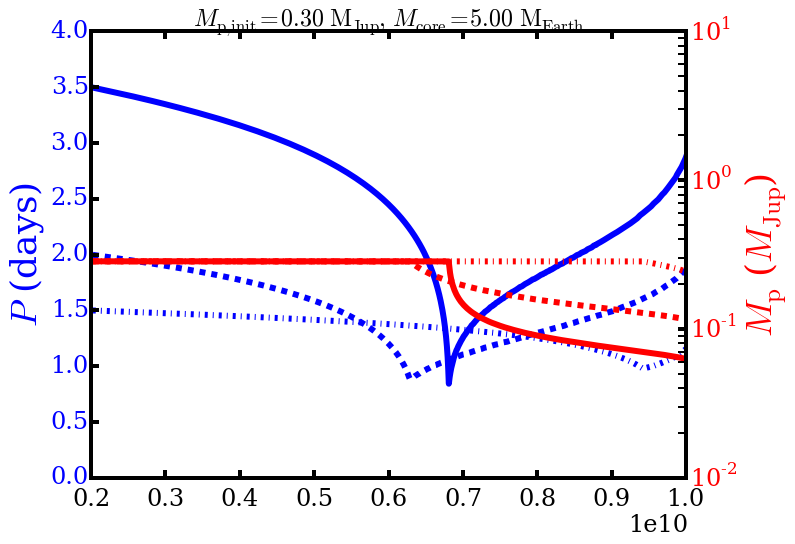

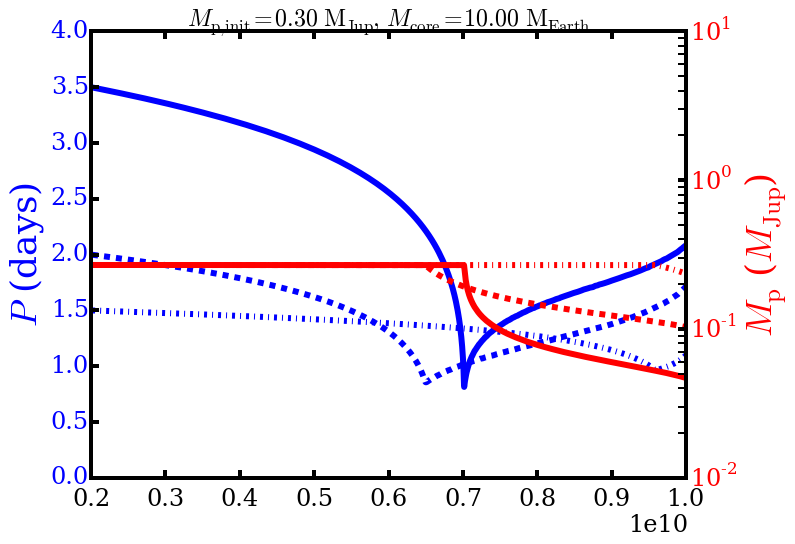

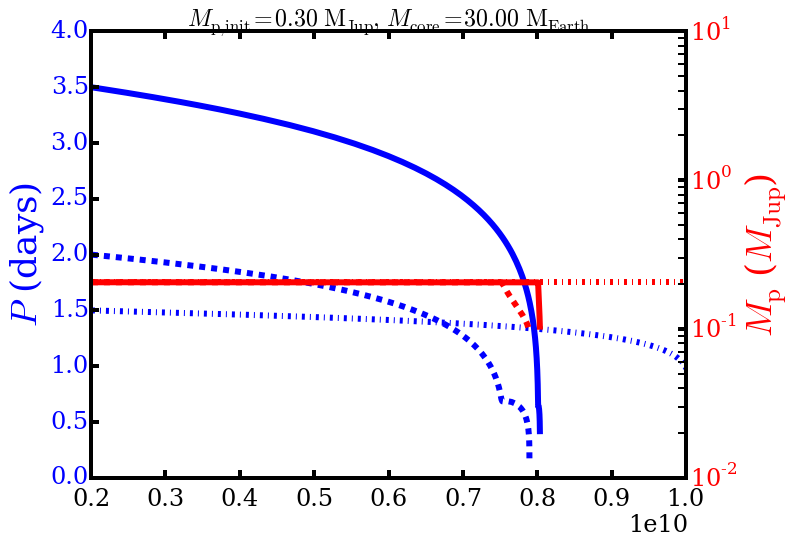

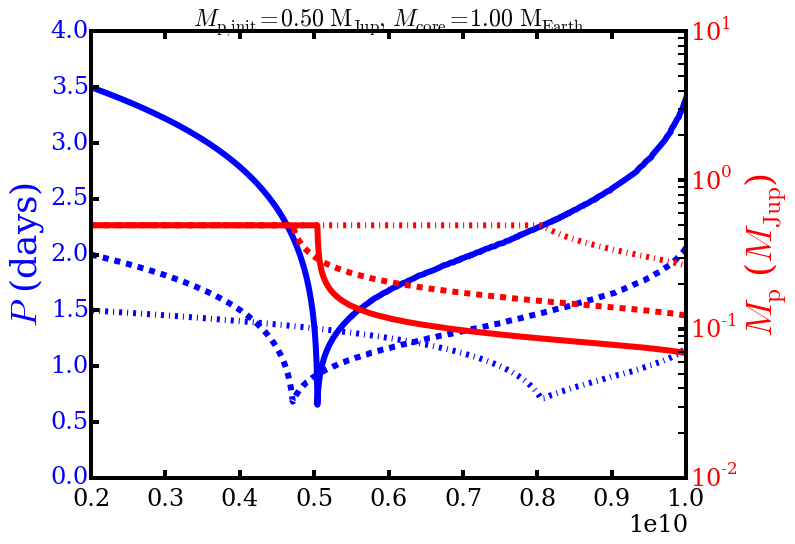

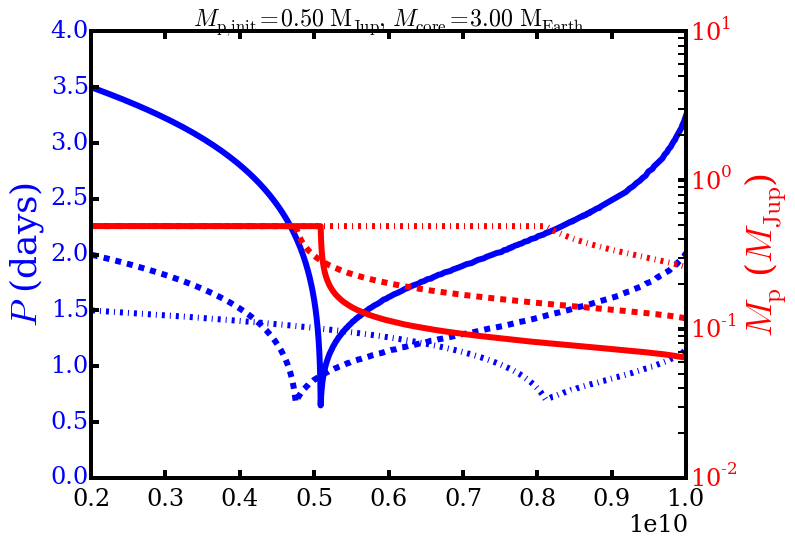

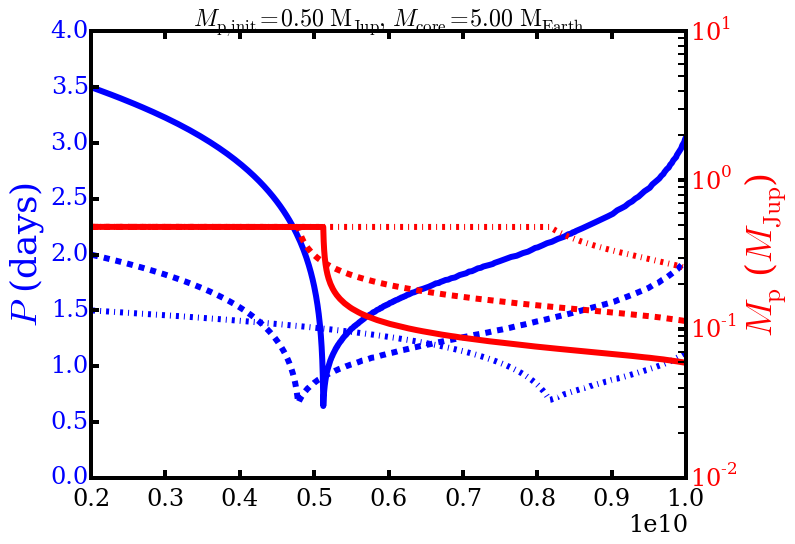

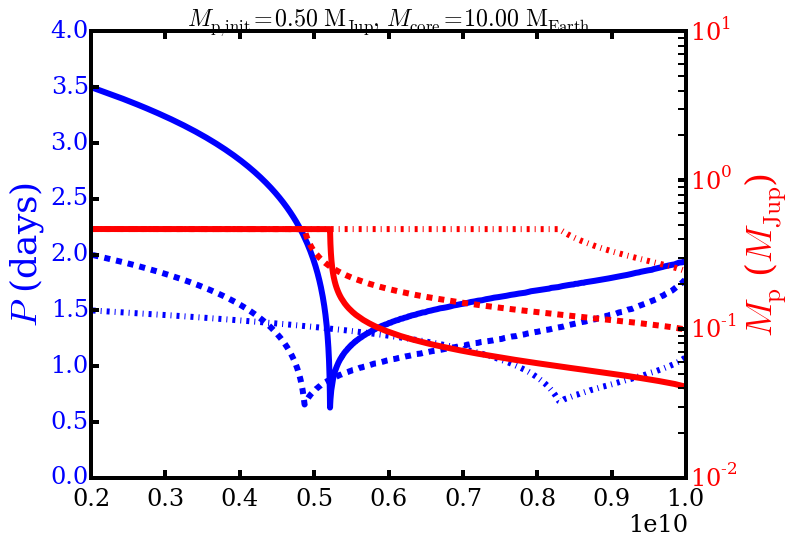

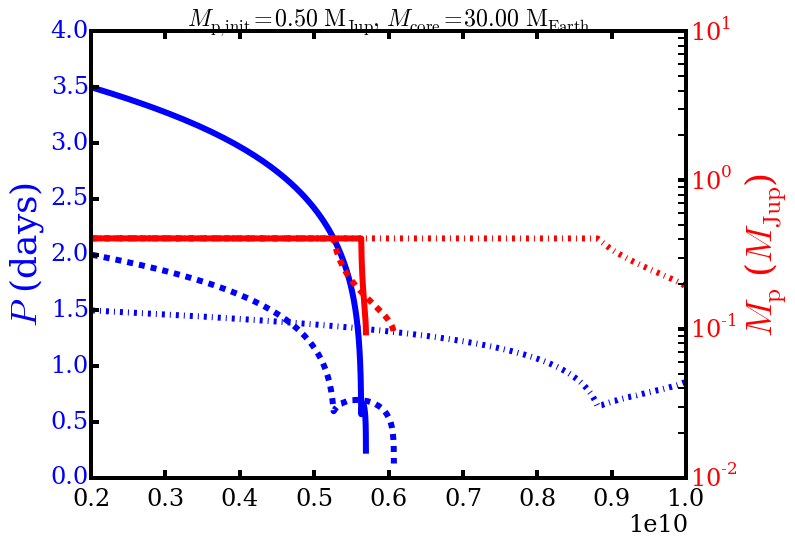

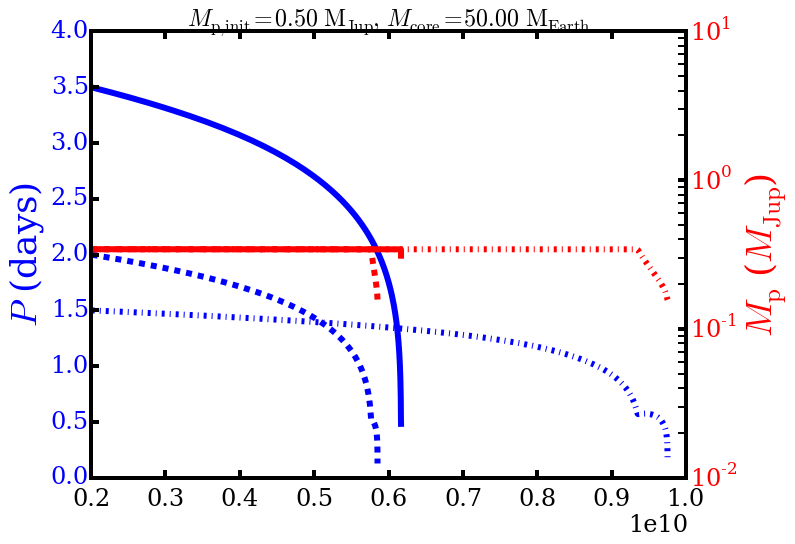

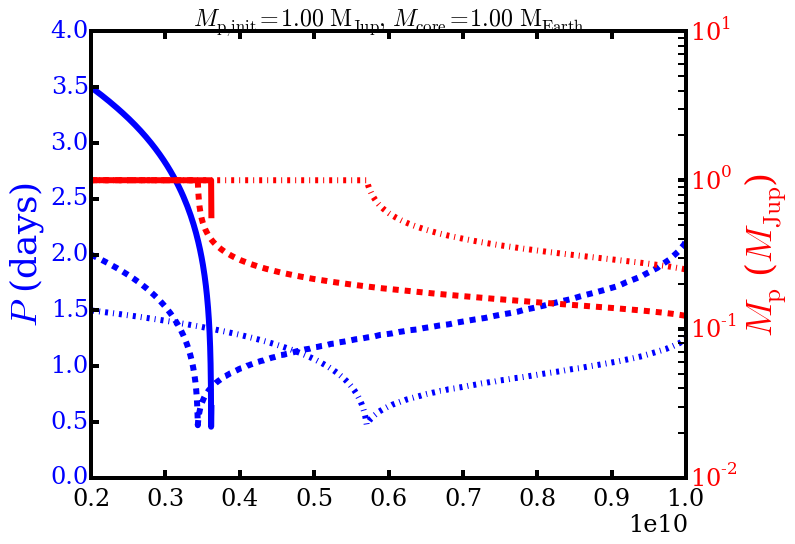

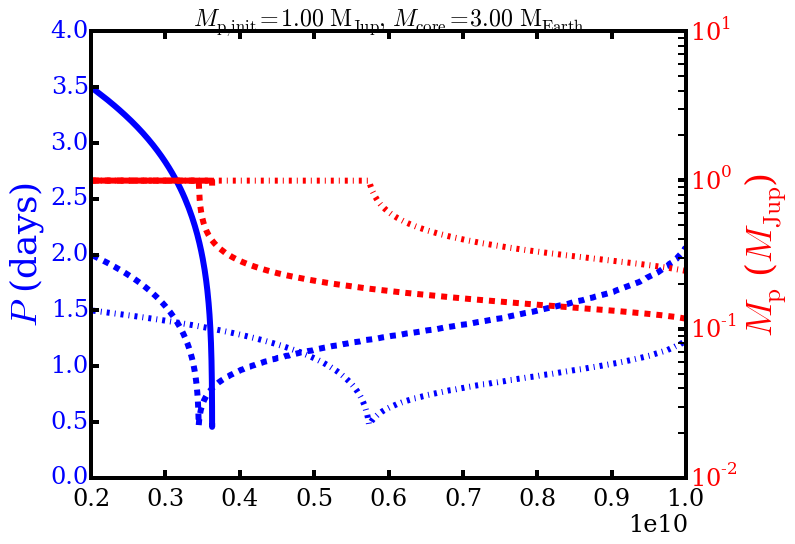

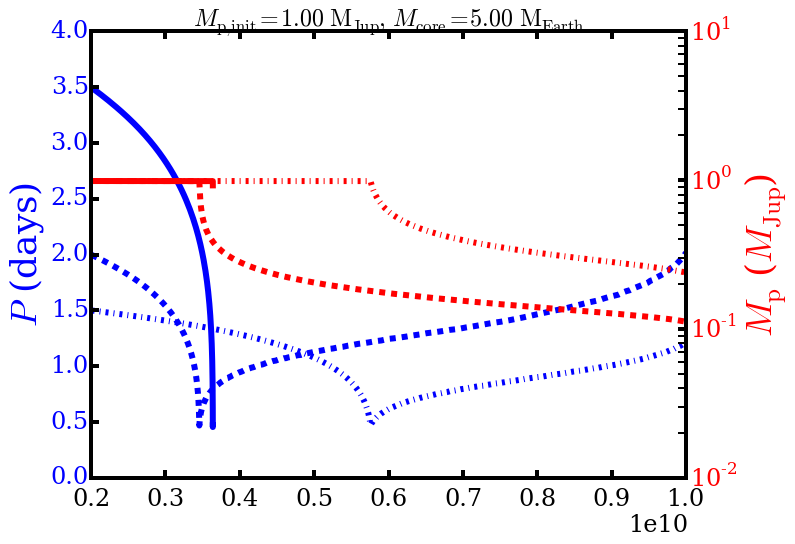

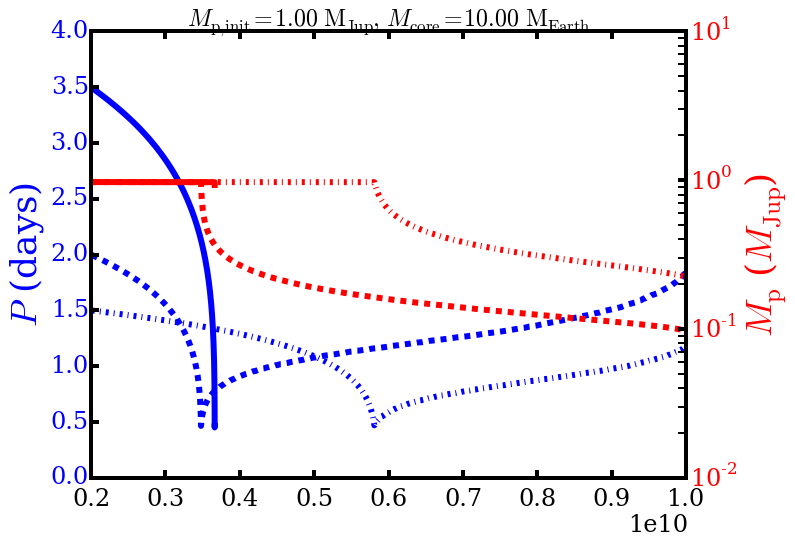

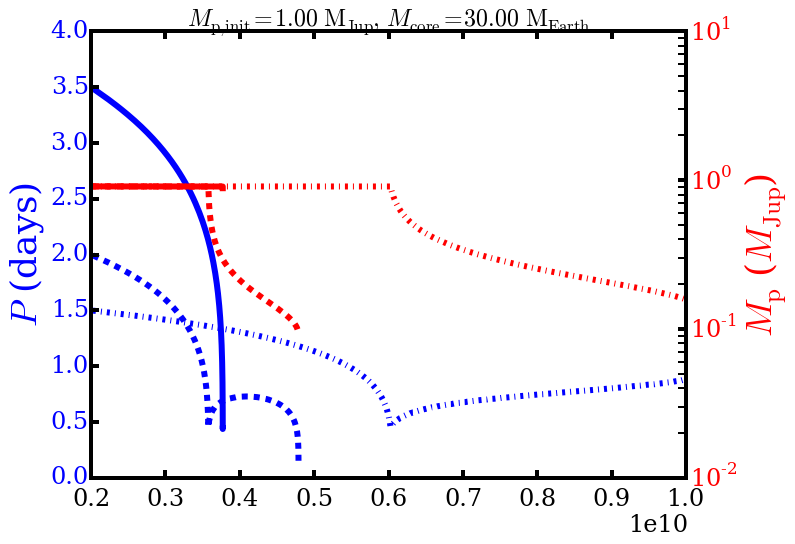

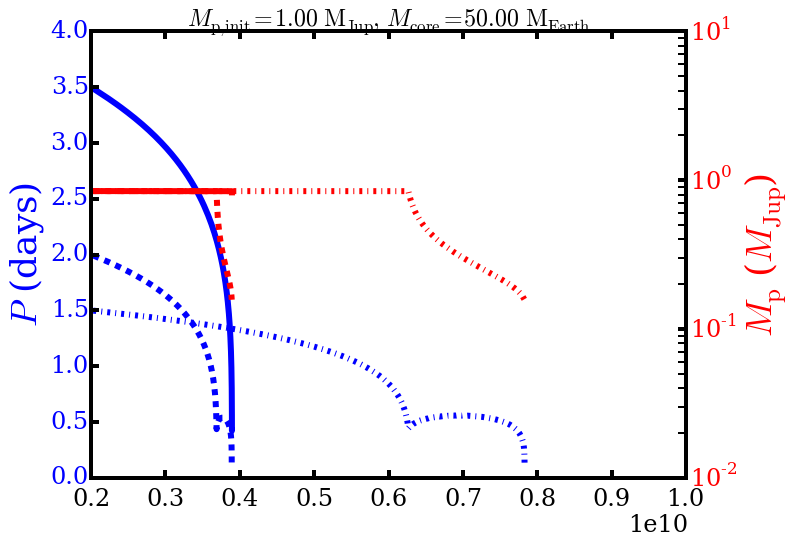

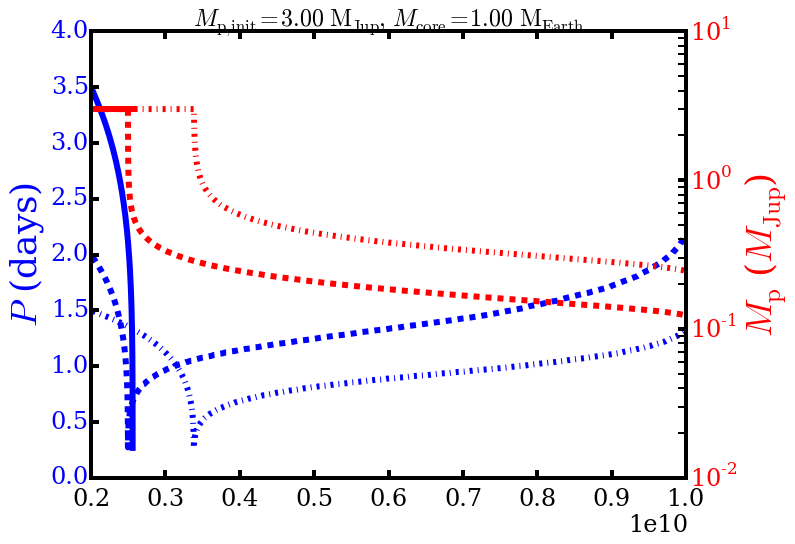

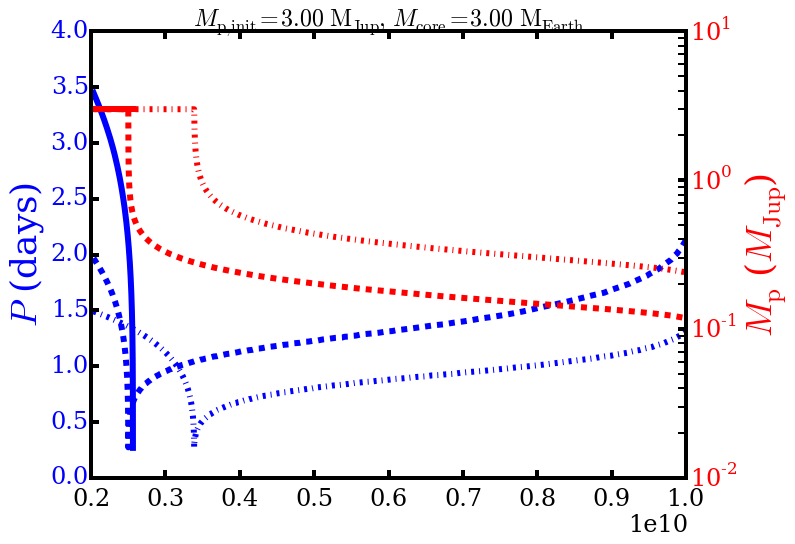

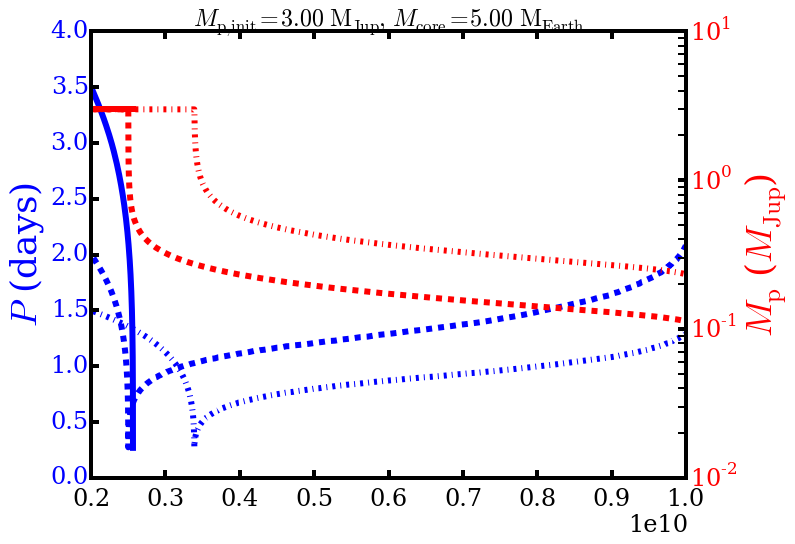

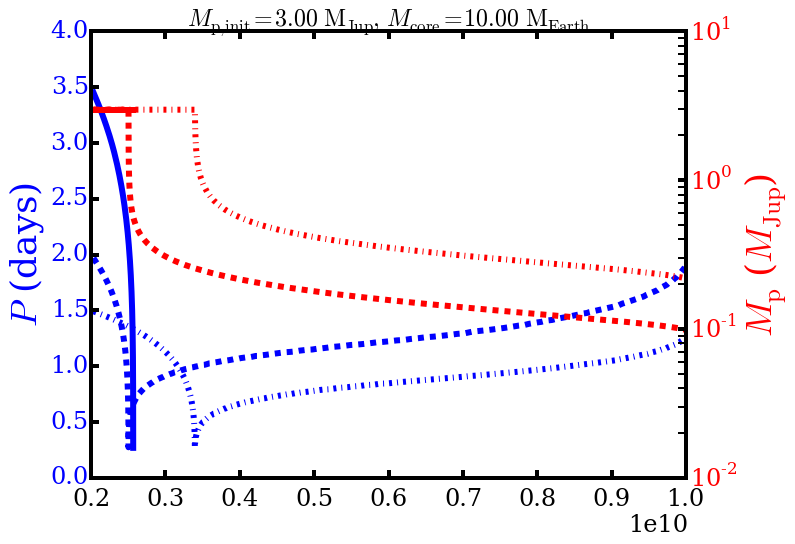

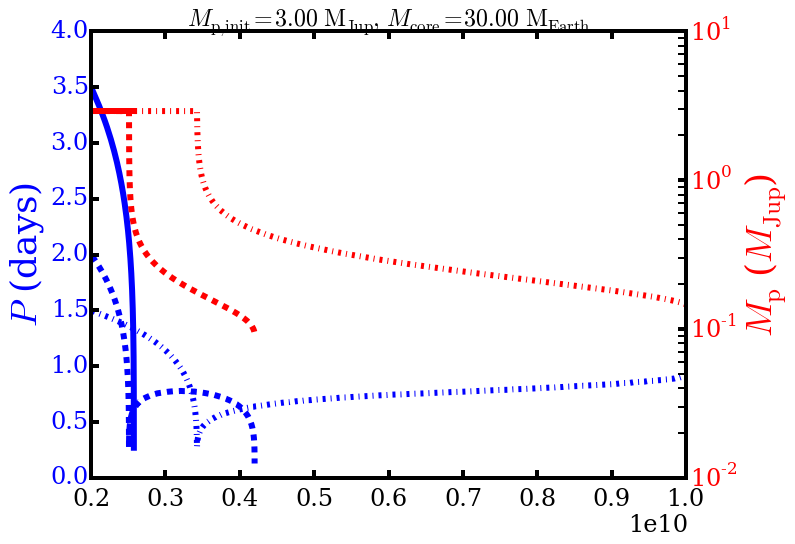

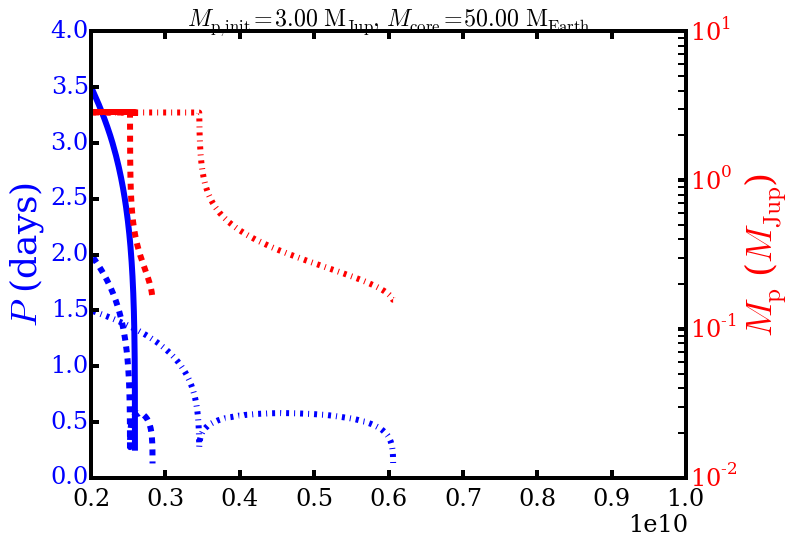

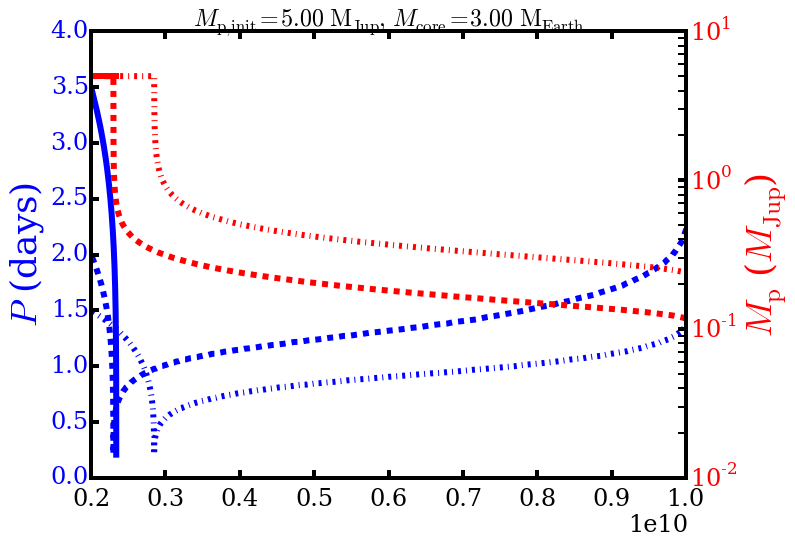

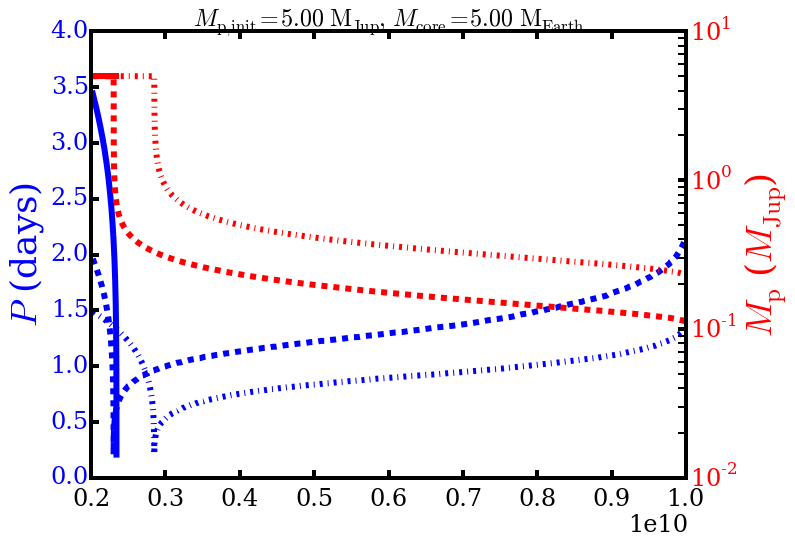

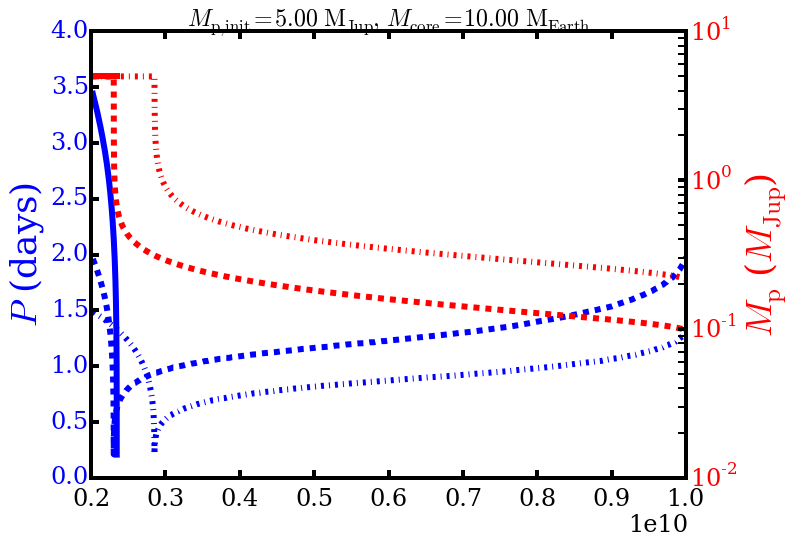

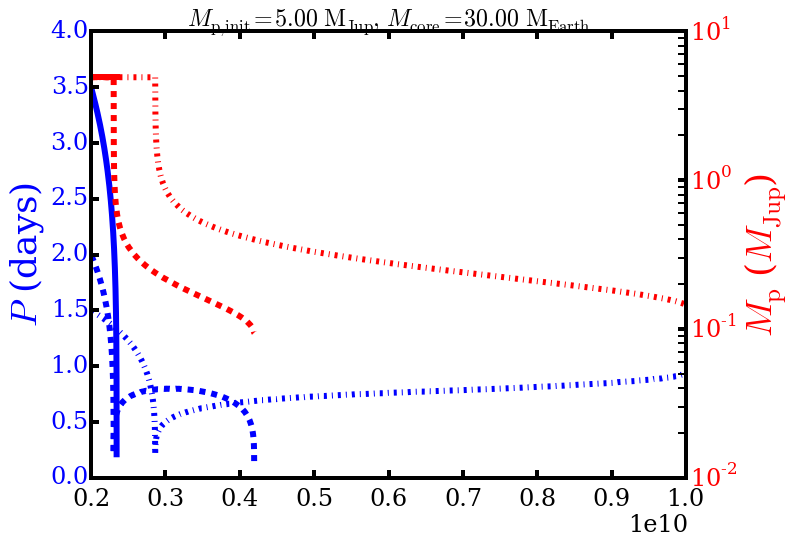

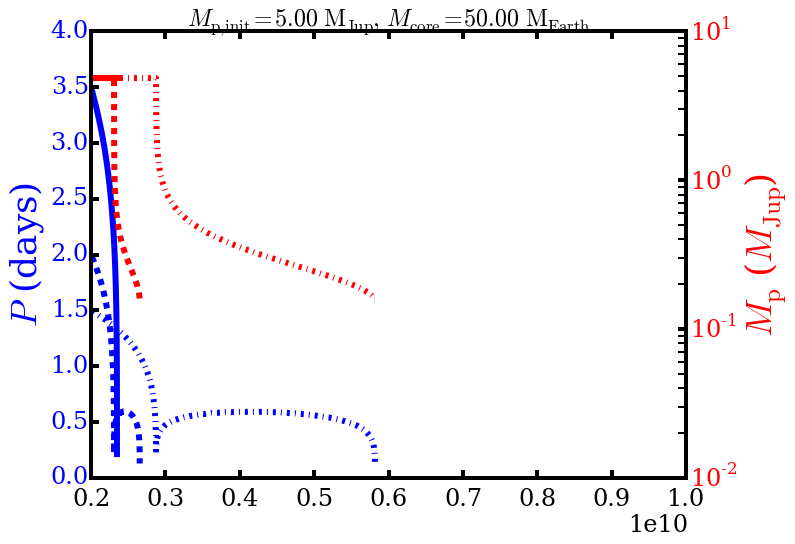

In [11]:
for cur_planet_mass in planet_masses:
    for cur_core_mass in core_masses:
        
        files = glob.glob('MESA/RLO_calculations/Mpinit_%.2f*%.2f_ME*20_Myr*/binary_history.data' % 
                          (cur_planet_mass, cur_core_mass))
        
        try:
            qs5 = ms.MesaData(files[0])
        except:
            continue

#            print(files)
        fig = plt.figure(figsize=(8*4./3,8))
        ax1 = fig.add_subplot(111)
        ax2 = ax1.twinx()
            
        ax1.set_ylabel('$P$ (days)', color='b', fontsize=36)
        ax2.set_ylabel('$M_\mathrm{p}$ ($M_\mathrm{Jup}$)', color='r', fontsize=36)

        ls = next(linecycler)
        ax1.plot(qs5.data('age'), qs5.data('period_days'), ls=ls, color='b', lw=6)
        ax2.semilogy(qs5.data('age'), qs5.data('star_1_mass')*Msol_to_MJup, ls=ls, color='r', lw=6)
               
        ax1.set_ylim([0, 4])
        ax1.set_xlim([2e9, 10e9])
        ax2.set_ylim([0.01, 10])
            
        ax1.grid('off')
        ax2.grid('off')
            
        for tl in ax1.get_yticklabels():
            tl.set_color('b')
        for tl in ax2.get_yticklabels():
            tl.set_color('r')
                
        plt.title("$M_{\\rm p, init} = %.2f\ {\\rm M_{Jup}},\ M_{\\rm core} = %.2f\ {\\rm M_{Earth}}$" % 
                  (cur_planet_mass, cur_core_mass), fontsize=24)
            
#             fig.savefig('MESA/RLO_calculations/plots/Mpinit_%.2f_MJup_%.2f_ME_2_Gyr_old.eps'% 
#                         (cur_planet_mass, cur_core_mass), dpi=1000, bbox_inches='tight')

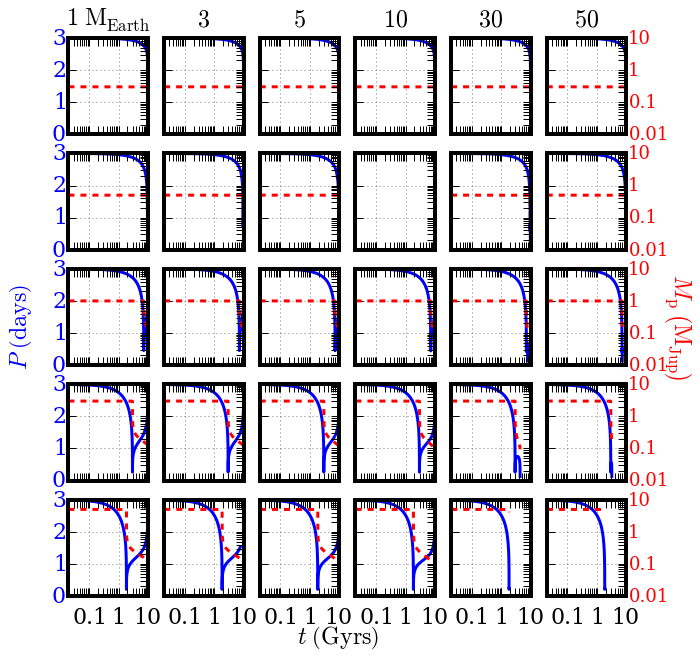

In [24]:
from matplotlib import ticker

# Two subplots, unpack the axes array immediately
fig, ax_arr = plt.subplots(5, 6, sharey=True, sharex=True, figsize=(10, 10))

for i in range(len(planet_masses[:-1])):
    for j in range(len(core_masses)):
        
        ax1 = ax_arr[i,j]
        ax1.tick_params(axis='both', labelsize=22, width=1, which='major') 
        ax1.tick_params(axis='both', labelsize=22, width=1, which='minor') 

        ax1.grid('on')
        ax1.set_xscale('log')        
        ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter("%g"))
        ax1.xaxis.set_tick_params(width=1)
        ax1.yaxis.set_tick_params(width=1)
        ax1.yaxis.set_ticks(np.arange(0, 4+1, 1.0))
        for tl in ax1.get_yticklabels():
            tl.set_color('b')
                    
        ax2 = ax1.twinx()
        ax2.tick_params(axis='both', labelsize=22, width=1, which='major') 
        ax2.tick_params(axis='both', labelsize=22, width=1, which='minor') 

        ax2.grid('off')      
        ax2.set_yscale('log')      
#        ax2.xaxis.set_tick_params(width=1)
#        ax2.yaxis.set_tick_params(width=1)
        if(j != len(core_masses) - 1):
            ax2.yaxis.set_major_formatter(plt.NullFormatter())
        else:
            ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter("%g"))
            ax2.tick_params(axis='both', labelsize=22)
            for tl in ax2.get_yticklabels():
                tl.set_color('r')

        if(i == 0):
            if(j == 0):
                ax1.set_title("$%g\ {\\rm M_{Earth}}$" % core_masses[j], fontsize=24, y=1.08)
            else:
                ax1.set_title("$%g$" % core_masses[j], fontsize=24, y=1.08)
                
        ax1.set_ylim([0, 3])
        ax1.set_xlim([0.02, 10])
        ax2.set_ylim([0.01, 10])

#         files = glob.glob('MESA/RLO_calculations/Mpinit_%.2f*%.2f_ME*qs5/binary_history.data' % 
#                           (planet_masses[i], core_masses[j]))
        files = glob.glob('MESA/RLO_calculations/Mpinit_%.2f*%.2f_ME*qs6/binary_history.data' % 
                           (planet_masses[i], core_masses[j]))


        try:
            qs = ms.MesaData(files[0])
        except:
            continue
        
        ax1.semilogx(qs.data('age')/1e9, qs.data('period_days'), color='b', lw=3)
        #MESA does NOT include the core mass in the mass of the planet, so I have to add it by hand.
        ax2.loglog(qs.data('age')/1e9, qs.data('star_1_mass')*MSol_to_MJup, color='r', lw=3, ls='--')
        
        ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter("%g"))
        ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter("%i"))
        
        if(j != len(core_masses) - 1):
            ax2.yaxis.set_major_formatter(plt.NullFormatter())
        else:
            ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter("%g"))
            ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter("%g"))
            ax2.tick_params(axis='both', labelsize=18)
            for tl in ax2.get_yticklabels():
                tl.set_color('r')

fig.text(0.5, 0.06, '$t\ \\left( {\\rm Gyrs} \\right)$', ha='center', fontsize=24)
fig.text(0.04, 0.5, '$P\ \\left( {\\rm days} \\right)$', va='center', rotation='vertical', fontsize=24, color='blue')
fig.text(0.95, 0.5, '$M_{\\rm p}\ \\left( {\\rm M_{Jup}} \\right)$', va='center', rotation='-90', fontsize=24, 
         color='red')

#fig.savefig('plot_mass_orbit_evolution_grid_qs5.eps', dpi=1000, bbox_inches='tight')
fig.savefig('plot_mass_orbit_evolution_grid_qs6.eps', dpi=1000, bbox_inches='tight')